## Python Library test Vanna Text - to - SQL Liberary

The contents in this notebook are tailored to validate vanna Python library that is coded to generate sql queries from textual prompts. The model is developed to generate accurate SQL queries using LLMs.

### The training datasets are the electric vehicle population data from US DoT

The csv file available is downloaded from https://catalog.data.gov/dataset/?tags=vehicle is loaded into a data frame which will be loaded onto sqlite database later

In [35]:
# =============================================================================================================== #
#                       WORK WITH ELECTRIC VEHICLE POPULATION DATA                                                #
# =============================================================================================================== #

# Importing the liberary and modules
import vanna as vn
import streamlit as st
import pandas as pd
import sqlite3


### Load dataset into dataframe

In [72]:
data = pd.read_csv("Downloads/Electric_Vehicle_Population_Data.csv")
data.rename(columns={'VIN (1-10)':'id', 'County':'county', 'City':'city', 'State':'state', 'Postal Code':'postal_code', 
             'Make':'make', 'Model Year':'model_year', 'Model':'model', 'Electric Vehicle Type':'type', 
             'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'clean_alternative_fuel_vehicle_eligiblity',
             'Electric Range':'electric_range', 'Base MSRP':'base_MSRP', 
             'Legislative District':'legislative_district', 'DOL Vehicle ID':'vehicle_id', 
             'Vehicle Location':'vehicle_location', 'Electric Utility':'electric_utility', 
             '2020 Census Tract':'census_tract'}, inplace=True)
data.head()

,id,county,city,state,postal_code,model_year,make,model,type,clean_alternative_fuel_vehicle_eligiblity,electric_range,base_MSRP,legislative_district,vehicle_id,vehicle_location,electric_utility,census_tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


## Load the data onto Database

In [73]:
# Save to a database
conn = sqlite3.connect("Downloads/Vehicle.sqlite")
data.to_sql("electric_vehicle_population", con=conn, if_exists='replace')


177866

## Connect to Vanna

In [74]:
# Connect to the database
from vanna.remote import VannaDefault
vn = VannaDefault(model='second_model', api_key="0f93bfb81ac543d691b7ec099d38bb4c")
vn.connect_to_sqlite("Downloads/Vehicle.sqlite") 


## Train the vanna model

In [75]:
# Train the model
# Give general information about the features of the data
vn.train(ddl="""CREATE TABLE IF NOT EXISTS electric_vehicle_population 
    (id TEXT, county TEXT, city TEXT, state TEXT, postal_code TEXT, 
    make TEXT, model INT, type TEXT, clean_alternative_fuel_vehicle_eligiblity TEXT,
    electric_range INT, base_MSRP TEXT, legislative_district TEXT, vehicle_id TEXT, 
    vehicle_location TEXT, electric_utility TEXT, census_tract TEXT)""")

Adding ddl: CREATE TABLE IF NOT EXISTS electric_vehicle_population 
    (id TEXT, county TEXT, city TEXT, state TEXT, postal_code TEXT, 
    make TEXT, model INT, type TEXT, clean_alternative_fuel_vehicle_eligiblity TEXT,
    electric_range INT, base_MSRP TEXT, legislative_district TEXT, vehicle_id TEXT, 
    vehicle_location TEXT, electric_utility TEXT, census_tract TEXT)


'59799-ddl'

In [76]:
# Give information on the source and nature of the data
vn.train(documentation=""""This database is a record of electric vehicle population in the US""")


Adding documentation....


'248864-doc'

In [77]:
# Train 
vn.train(question = "In which state are the electric vehicles most sold?",
sql = """SELECT state, count(*) AS records FROM electric_vehicle_population GROUP BY state ORDER BY records DESC LIMIT 10""")

'9802ba9af4fb2126c4dfe6c966df8f3c-sql'

In [85]:
# Train 
vn.train(question="What is the time trend of electric vehicle demand over years?",
sql="""SELECT model_year as Year, count(*) AS records FROM electric_vehicle_population GROUP BY model_year""")

'4f92d05eeb1e1fa43de79d29459a179e-sql'

In [79]:
# Train 
vn.train(question="What are the top manufacturers of electric vehicles?",
sql = """SELECT make, count(*) AS total_sale FROM electric_vehicle_population 
GROUP BY make ORDER BY total_sale DESC LIMIT 10""")


'3557d1078ab8253091f278f057295f7d-sql'

In [62]:
# Train 
vn.train(question="Which city has the most electric vehicles?",
sql="""SELECT city, count(*) AS records FROM electric_vehicle_population 
GROUP BY city ORDER by records DESC LIMIT 3""")


'fbc8686e4df6e7953c51bb029533f1cd-sql'

In [65]:
# Train 
vn.train(question="What are the most electric vehicle models available in the market?",
sql="""SELECT model, count(*) AS records FROM electric_vehicle_population 
GROUP BY model ORDER by records DESC LIMIT 10""")


'3df539cdfab40402e7a4ecaa276d5fec-sql'

In [66]:
# Train 
vn.train(question="What are the types of electric vehicles with their market share?",
sql="""SELECT type, count(*) AS records FROM electric_vehicle_population 
GROUP BY type ORDER by records DESC LIMIT 10""")

'1cf85674fd31a5ab7f94cc9af7a166b2-sql'

In [67]:
# Train 
vn.train(question="What is the clean alternative eligibility of electric vehicles?",
sql="""SELECT clean_alternative_fuel_vehicle_eligiblity AS Eligibility, count(*) AS records 
FROM electric_vehicle_population GROUP BY clean_alternative_fuel_vehicle_eligiblity ORDER by records""")

'937b374e0c8a1803a3284f0a2a3f393b-sql'

In [90]:
# Train 
vn.train(question="Where are the most electric utilities for electric vehicles?",
sql="""SELECT electric_utility AS Electric Utility, count(*) AS records 
FROM electric_vehicle_population GROUP BY electric_utility ORDER by records LIMIT 10""")

'b83d62dea4ea486ca8f6af7fbf377dfd-sql'

## Ask the model to respond for human language questions

SELECT model_year as Year, count(*) AS records FROM electric_vehicle_population GROUP BY model_year
    Year  records
0   1997        1
1   1998        1
2   1999        5
3   2000        7
4   2002        2
5   2003        1
6   2008       20
7   2010       23
8   2011      775
9   2012     1618
10  2013     4409
11  2014     3509
12  2015     4844
13  2016     5483
14  2017     8562
15  2018    14323
16  2019    10940
17  2020    11768
18  2021    19132
19  2022    27776
20  2023    57587
21  2024     7080


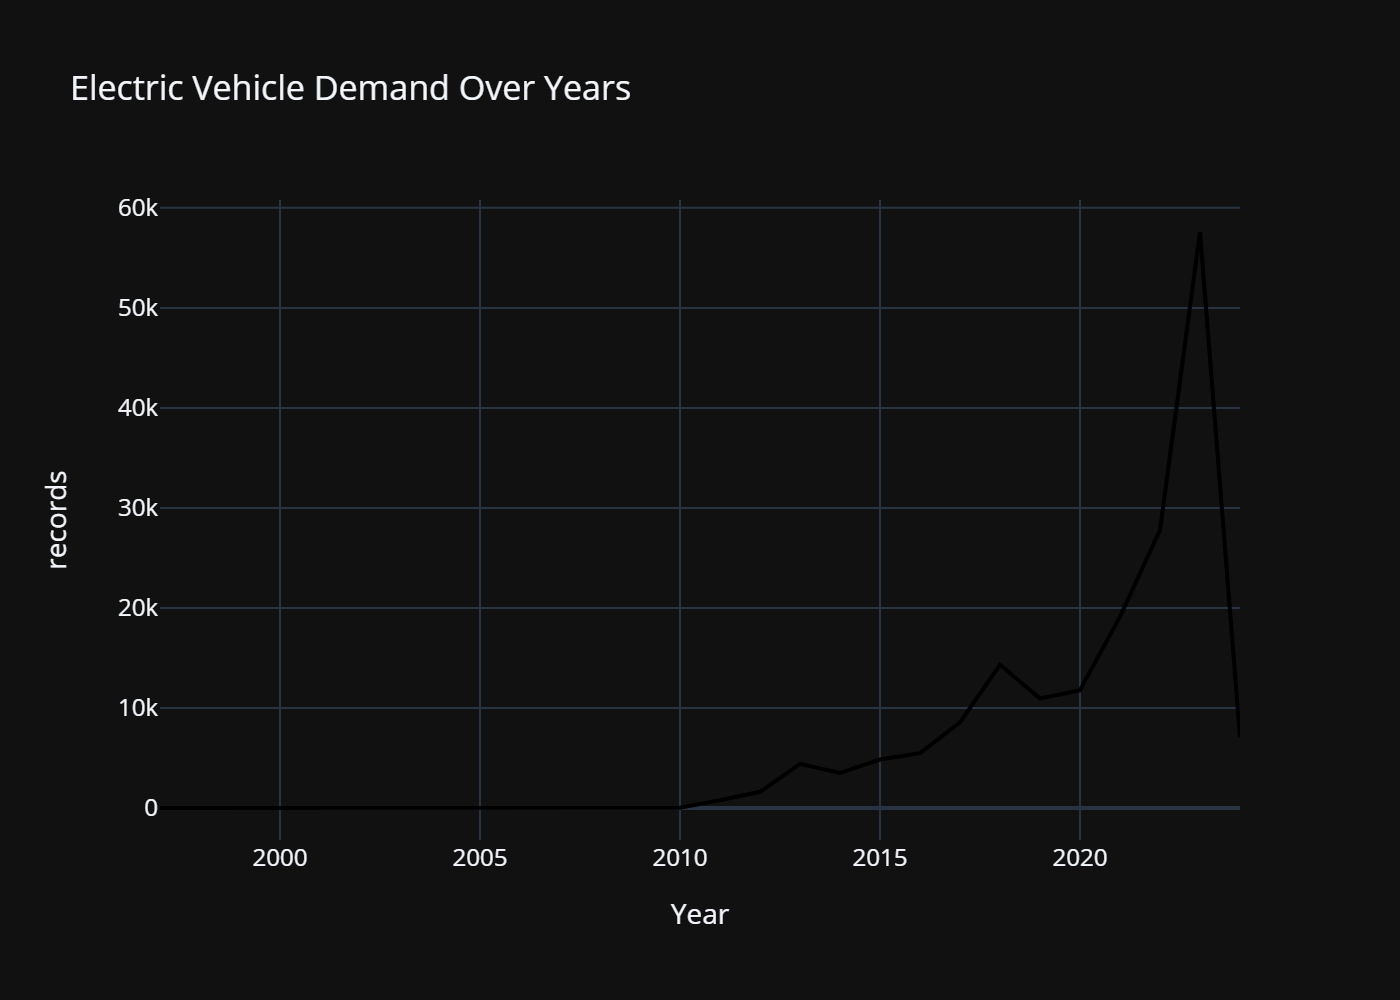

('SELECT model_year as Year, count(*) AS records FROM electric_vehicle_population GROUP BY model_year',
     Year  records
 0   1997        1
 1   1998        1
 2   1999        5
 3   2000        7
 4   2002        2
 5   2003        1
 6   2008       20
 7   2010       23
 8   2011      775
 9   2012     1618
 10  2013     4409
 11  2014     3509
 12  2015     4844
 13  2016     5483
 14  2017     8562
 15  2018    14323
 16  2019    10940
 17  2020    11768
 18  2021    19132
 19  2022    27776
 20  2023    57587
 21  2024     7080,
 None)

In [86]:
# Prompt for LLM response
vn.ask('What is the time trend of electric vehicle demand over years?')

SELECT state, count(*) AS records FROM electric_vehicle_population GROUP BY state ORDER BY records DESC LIMIT 10
  state  records
0    WA   177477
1    CA      101
2    VA       46
3    MD       31
4    TX       23
5    NC       16
6    IL       15
7    CO       12
8    FL       10
9    AZ       10


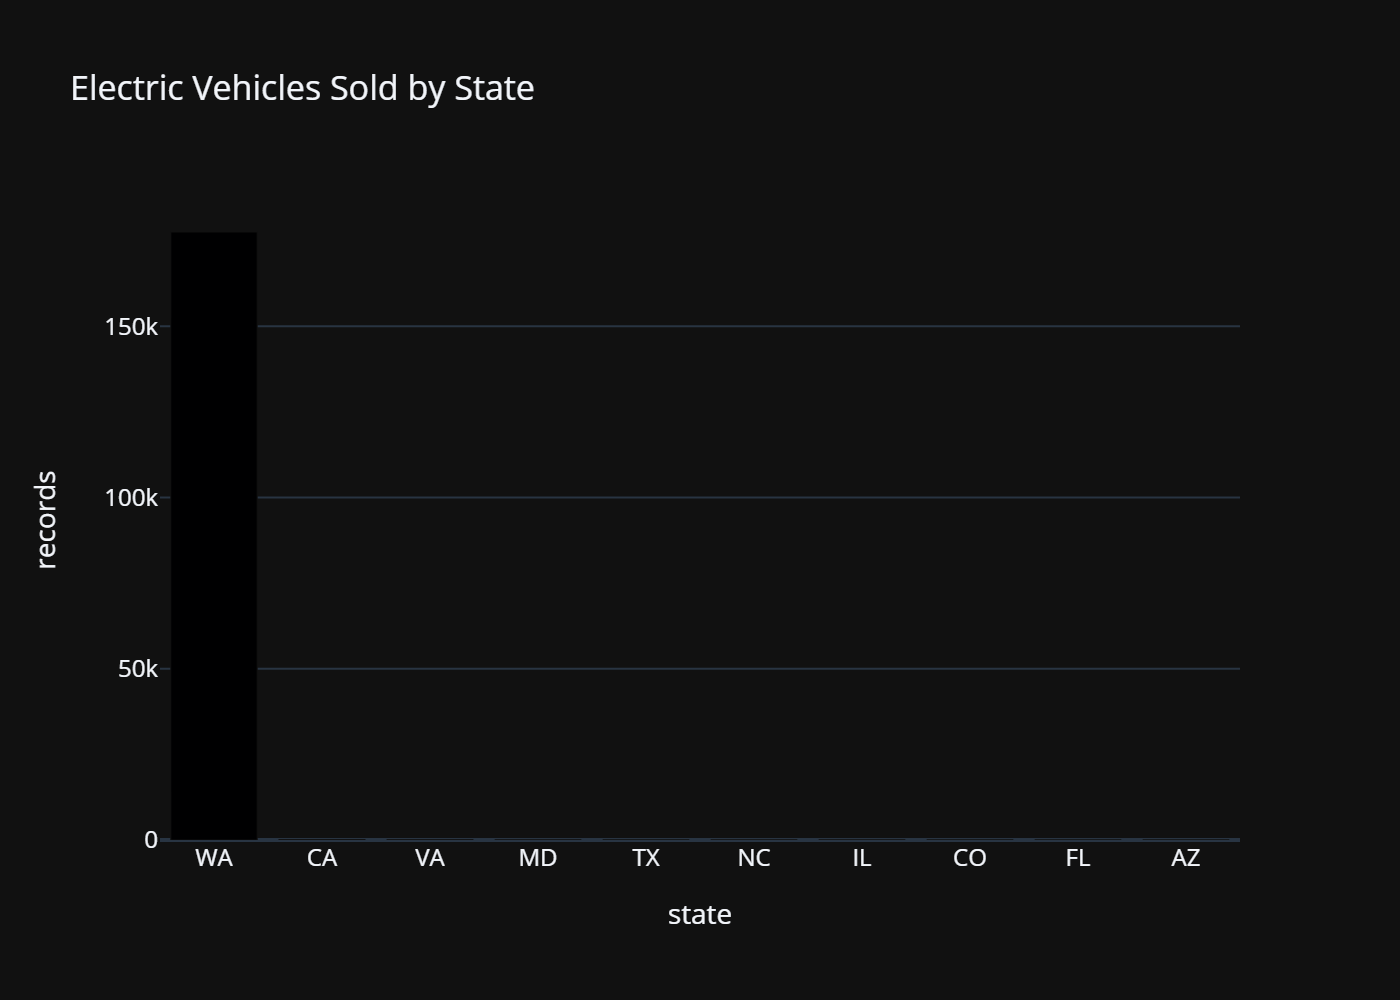

('SELECT state, count(*) AS records FROM electric_vehicle_population GROUP BY state ORDER BY records DESC LIMIT 10',
   state  records
 0    WA   177477
 1    CA      101
 2    VA       46
 3    MD       31
 4    TX       23
 5    NC       16
 6    IL       15
 7    CO       12
 8    FL       10
 9    AZ       10,
 None)

In [87]:
# Prompt for LLM response
vn.ask('In which state are the electric vehicles most sold?')

SELECT type, count(*) AS records FROM electric_vehicle_population 
GROUP BY type ORDER by records DESC LIMIT 10
                                     type  records
0          Battery Electric Vehicle (BEV)   139210
1  Plug-in Hybrid Electric Vehicle (PHEV)    38656


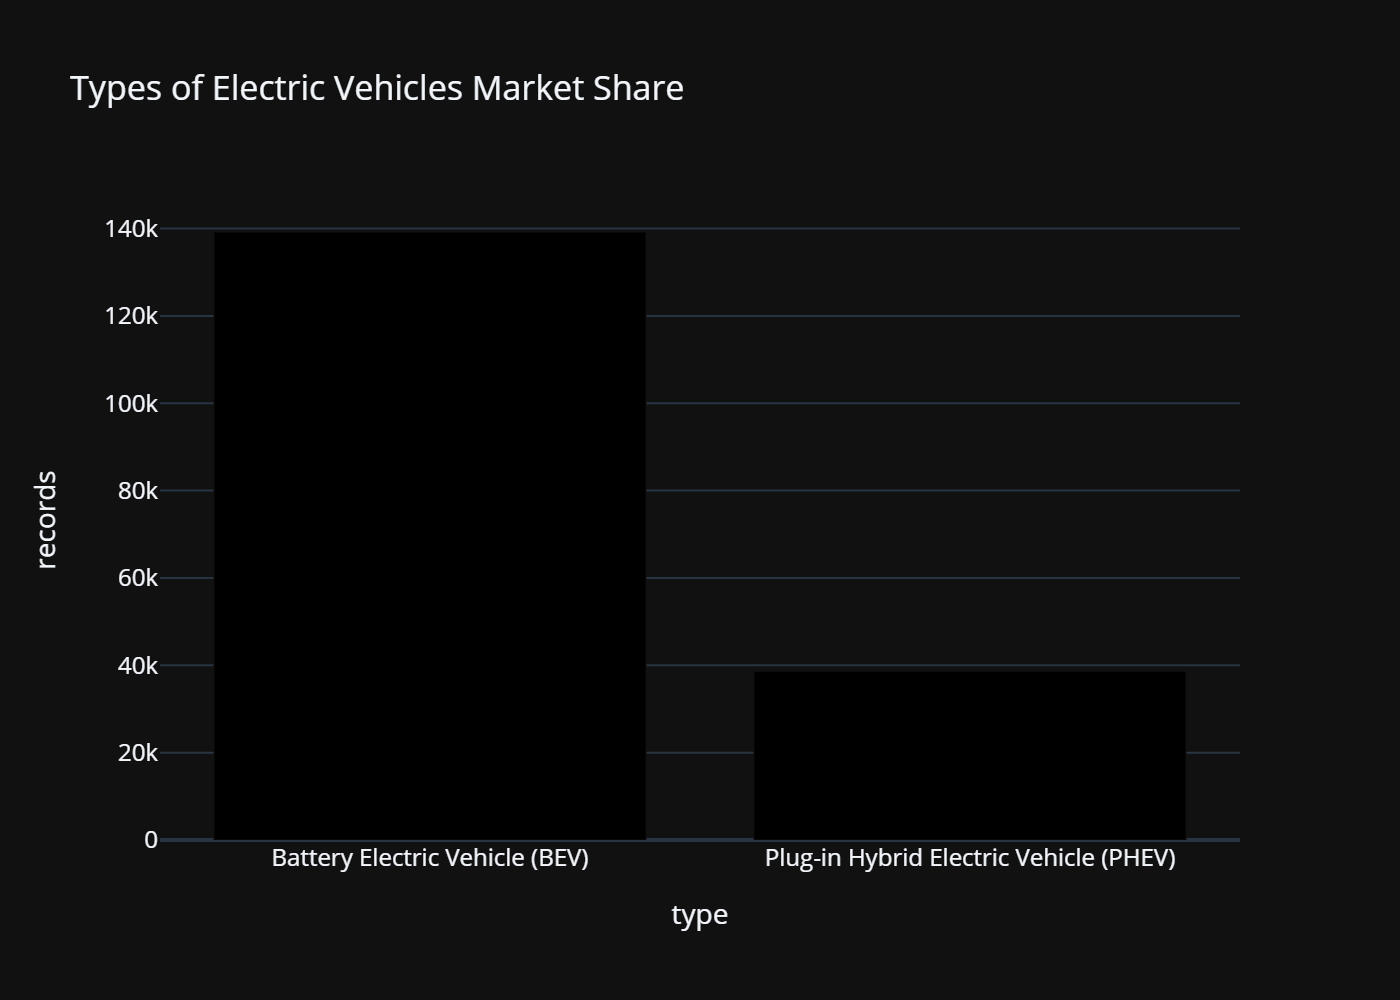

('SELECT type, count(*) AS records FROM electric_vehicle_population \nGROUP BY type ORDER by records DESC LIMIT 10',
                                      type  records
 0          Battery Electric Vehicle (BEV)   139210
 1  Plug-in Hybrid Electric Vehicle (PHEV)    38656,
 None)

In [89]:
# Prompt for LLM response
vn.ask('What are the types of electric vehicles with their market share?')

SELECT model, count(*) AS records FROM electric_vehicle_population 
GROUP BY model ORDER by records DESC LIMIT 10
            model  records
0         MODEL Y    35989
1         MODEL 3    30092
2            LEAF    13366
3         MODEL S     7735
4         BOLT EV     6821
5         MODEL X     5796
6            VOLT     4796
7            ID.4     3937
8        WRANGLER     3392
9  MUSTANG MACH-E     3322


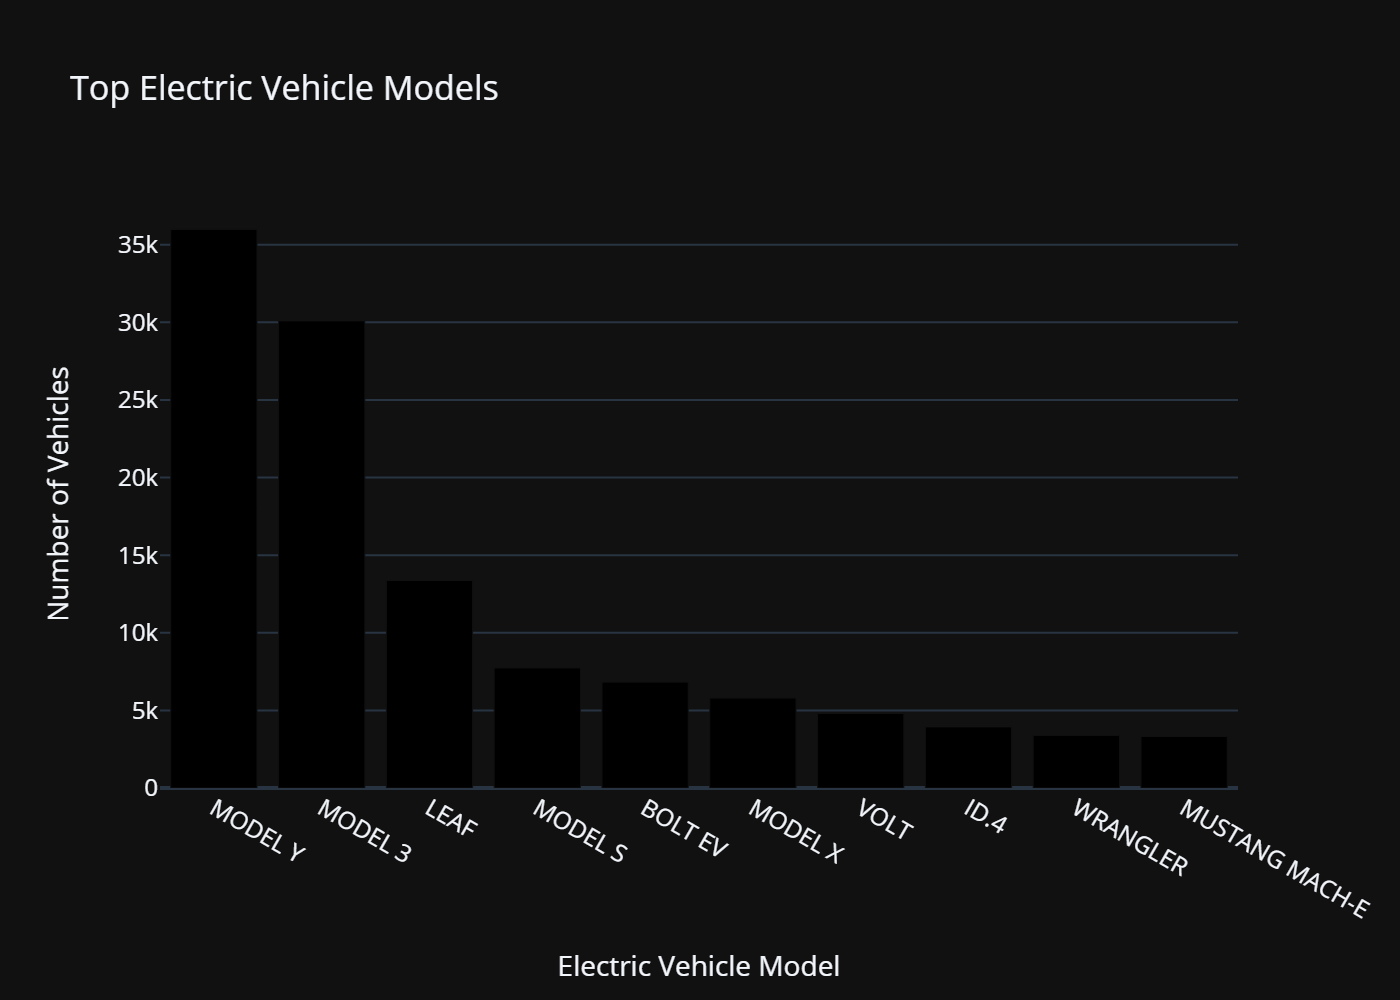

('SELECT model, count(*) AS records FROM electric_vehicle_population \nGROUP BY model ORDER by records DESC LIMIT 10',
             model  records
 0         MODEL Y    35989
 1         MODEL 3    30092
 2            LEAF    13366
 3         MODEL S     7735
 4         BOLT EV     6821
 5         MODEL X     5796
 6            VOLT     4796
 7            ID.4     3937
 8        WRANGLER     3392
 9  MUSTANG MACH-E     3322,
 None)

In [93]:
# Prompt for LLM response
vn.ask('What are the most electric vehicle models available in the market?')

SELECT city, count(*) AS records FROM electric_vehicle_population 
GROUP BY city ORDER by records DESC LIMIT 3
       city  records
0   Seattle    29447
1  Bellevue     8931
2   Redmond     6478


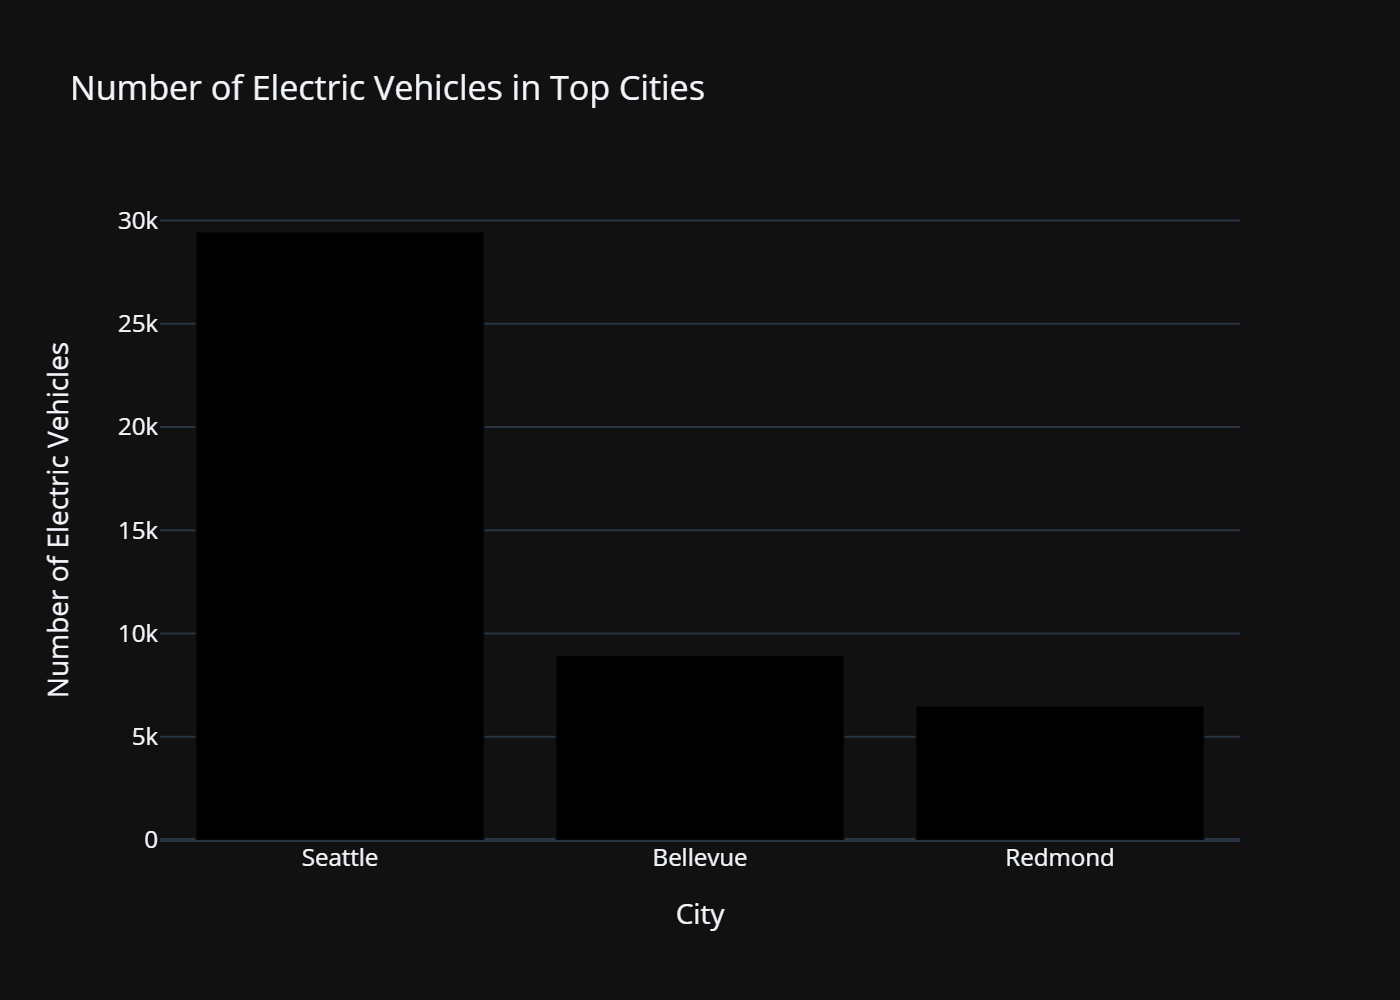

('SELECT city, count(*) AS records FROM electric_vehicle_population \nGROUP BY city ORDER by records DESC LIMIT 3',
        city  records
 0   Seattle    29447
 1  Bellevue     8931
 2   Redmond     6478,
 None)

In [94]:
# Prompt for LLM response
vn.ask('Which city has the most electric vehicles?')

In [ ]:
# || ===================================================================================|| #
# ||                         Let us pause here                                          || #
# || ===================================================================================|| #